In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Interpolation (Phep noi suy)

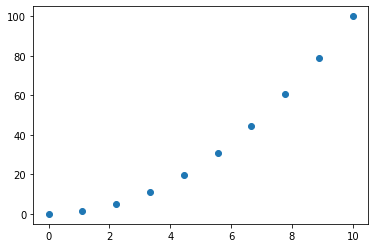

In [106]:
x = np.linspace(0,10,10)
y = x**2
plt.scatter(x,y)

In [107]:
from scipy.interpolate import interp1d

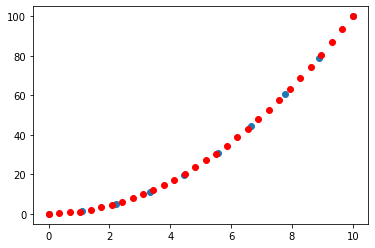

In [109]:
f = interp1d(x,y, kind='linear')
new_x = np.linspace(0,10,30)
result = f(new_x)

plt.scatter(x,y)
plt.scatter(new_x, result, c='r')

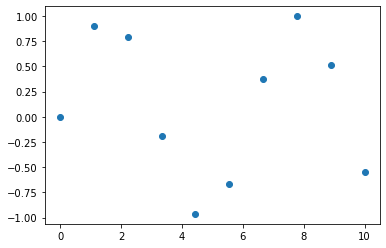

In [7]:
x = np.linspace(0,10,10)
y = np.sin(x)
plt.scatter(x,y)

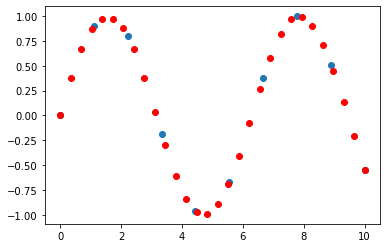

In [12]:
f = interp1d(x,y, kind='cubic')
new_x = np.linspace(0,10,30)
result = f(new_x)

plt.scatter(x,y)
plt.scatter(new_x, result, c='r')

# 2.Optimize

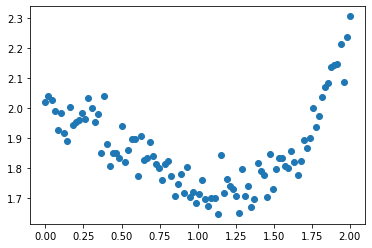

In [47]:
x = np.linspace(0,2,100)
y = 1/3*x**3 - 3/5*x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x,y)

In [14]:
def f(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d

In [15]:
from scipy import optimize

In [17]:
params, param_cov = optimize.curve_fit(f,x,y)

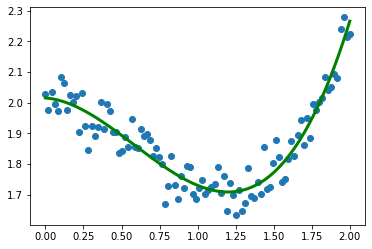

In [20]:
plt.scatter(x,y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g', lw=3)

# 3. Minimisation

In [21]:
def f(x):
    return x**2 + 15*np.sin(x)

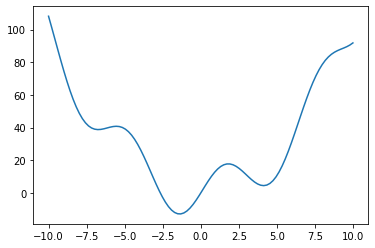

In [23]:
x = np.linspace(-10,10,100)
plt.plot(x, f(x))

In [27]:
x0 = -5
result = optimize.minimize(f,x0=x0).x

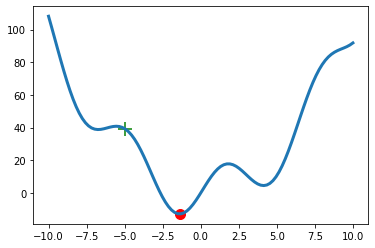

In [29]:
plt.plot(x, f(x), lw=3)
plt.scatter(result, f(result), s=100, c='r')
plt.scatter(x0, f(x0), s=200, marker='+', c='g')
plt.show()

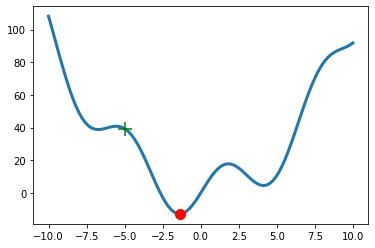

In [32]:
plt.plot(x, f(x), lw=3, zorder=-1)
plt.scatter(result, f(result), s=100, c='r',zorder=1)
plt.scatter(x0, f(x0), s=200, marker='+', c='g',zorder=1)
plt.show()

In [33]:
def f(x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])

[-0.78539916 -2.35619343]


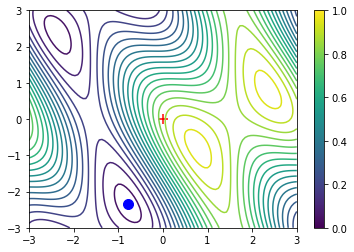

In [39]:
x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)

x,y = np.meshgrid(x,y)
plt.contour(x,y,f(np.array([x,y])), 20)

x0 = np.zeros((2,1))
plt.scatter(x0[0], x0[1], s=100, marker='+', c='r',zorder=1)
plt.colorbar()

result = optimize.minimize(f,x0=x0).x
plt.scatter(result[0], result[1], s=100, c='b',zorder=1)
print(result)


# 4. Traitement du signal

In [40]:
from scipy import signal

In [59]:
x = np.linspace(0,30,1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + x**2

In [60]:
new_y = signal.detrend(y)

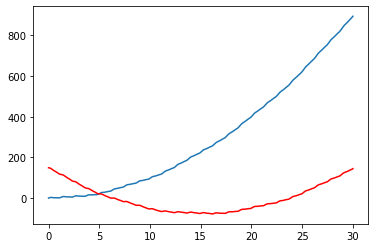

In [61]:
plt.plot(x,y)
plt.plot(x, new_y, c='r')

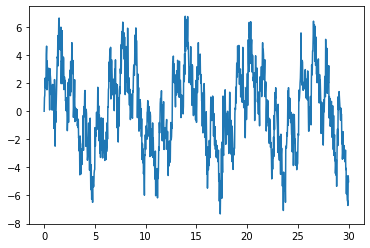

In [70]:
x = np.linspace(0,30,1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.randn(x.shape[0])
plt.plot(x,y)

In [63]:
from scipy import fftpack

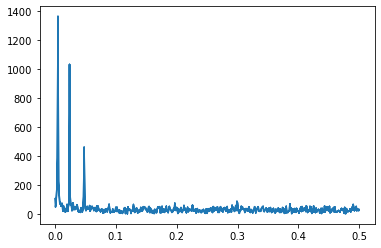

In [74]:
fourier = fftpack.fft(y)
power = np.abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

In [75]:
fourier[power<400] = 0

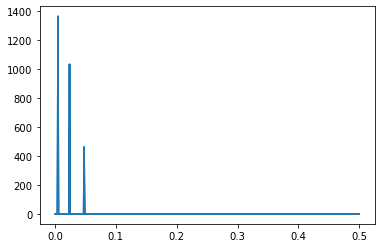

In [77]:
plt.plot(np.abs(frequences), np.abs(fourier))

In [78]:
filtered_signal = fftpack.ifft(fourier)

C:\Users\Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


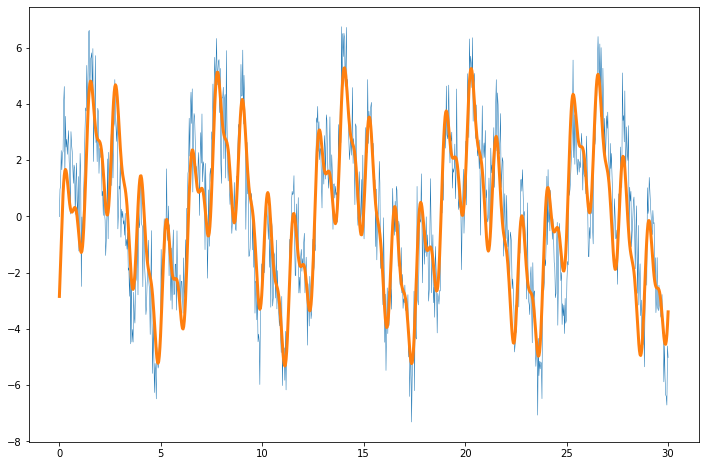

In [80]:
plt.figure(figsize=(12,8))
plt.plot(x,y,lw=0.5)
plt.plot(x, filtered_signal, lw=3)
plt.show()

# 5. Image Processing

In [81]:
 from scipy import ndimage

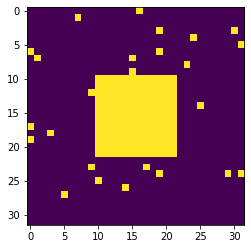

In [85]:
np.random.seed(0)
X = np.zeros((32,32))
X[10:-10, 10:-10] = 1
X[np.random.randint(0,32,30),np.random.randint(0,32,30)] = 1
plt.imshow(X)

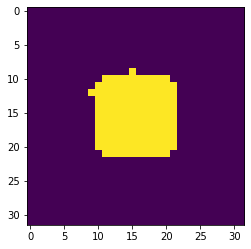

In [87]:
open_x = ndimage.binary_opening(X) #opening = combinaison erosion et dilation
plt.imshow(open_x)

(480, 640)

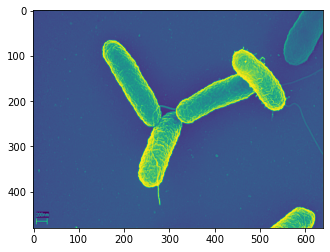

In [96]:
image = plt.imread('bacteria.jpg')
image = image[:,:,0]
plt.imshow(image)
image.shape

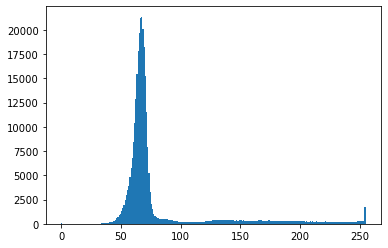

In [97]:
image_2 = np.copy(image)
plt.hist(image_2.ravel(), bins=255)
plt.show()

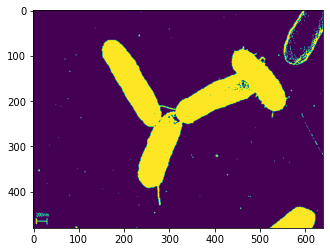

In [98]:
image = image > 100
plt.imshow(image)

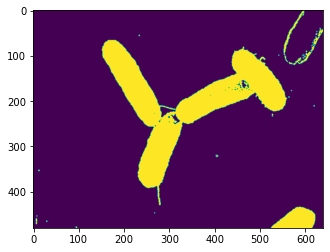

In [99]:
open_x = ndimage.binary_opening(image) 
plt.imshow(open_x)

In [100]:
label_image, n_labels = ndimage.label(open_x)
print(n_labels)

27


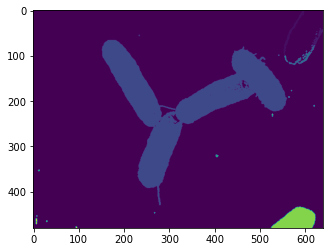

In [101]:
plt.imshow(label_image)

In [102]:
sizes = ndimage.sum(open_x, label_image, range(n_labels))

In [103]:
sizes

array([0.0000e+00, 5.2400e+02, 2.3400e+02, 5.0000e+00, 1.2000e+01,
       8.0000e+00, 3.7953e+04, 8.0000e+00, 5.9000e+01, 8.0000e+00,
       3.0800e+02, 1.1000e+01, 5.0000e+00, 3.8000e+01, 1.0000e+01,
       8.0000e+00, 5.0000e+00, 8.0000e+00, 8.0000e+00, 1.5000e+01,
       2.1000e+01, 1.0000e+01, 3.0860e+03, 5.0000e+00, 5.0000e+00,
       3.7000e+01, 8.0000e+00])

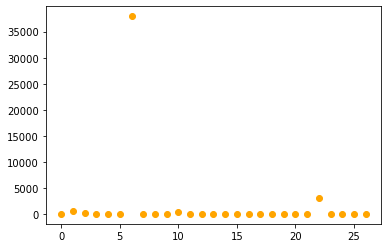

In [104]:
plt.scatter(range(n_labels), sizes, c='orange')